# Bài tập Naive Bayes

## Sử dụng GaussianNB để phân nhóm cho tập Titanic dataset
- dataset: 'Titanic_train.csv', 'Titanic_test.csv'


In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

### Read the train and test dataset

In [281]:
X_train = pd.read_csv('./datasets/Titanic_train.csv', index_col=0)
X_test = pd.read_csv('./datasets/Titanic_test.csv')

### Explore the dataset

In [282]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### The numberic features

In [284]:
X_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### The catetorical features

In [285]:
X_train.groupby(['Ticket']).size()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64

In [286]:
X_train.groupby(['Cabin']).size()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [287]:
X_train.groupby(['Sex']).size()

Sex
female    314
male      577
dtype: int64

In [288]:
X_train.groupby(['Embarked']).size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [289]:
print('About the train dataset: ')
print(f'The number of individuals: {X_train.shape[0]}')
print(f'The number of features: {X_train.shape[1]}')
print('\nAbout the test dataset: ')
print(f'The number of individuals: {X_test.shape[0]}')
print(f'The number of features: {X_test.shape[1]}')

About the train dataset: 
The number of individuals: 891
The number of features: 11

About the test dataset: 
The number of individuals: 418
The number of features: 11


### Descrition about dataset

VARIABLE DESCRIPTIONS:  
survival        Survival  
                (0 = No; 1 = Yes)  
pclass          Passenger Class  
                (1 = 1st; 2 = 2nd; 3 = 3rd)  
name            Name  
sex             Sex  
age             Age  
sibsp           Number of Siblings/Spouses Aboard  
parch           Number of Parents/Children Aboard  
ticket          Ticket Number  
fare            Passenger Fare  
cabin           Cabin  
embarked        Port of Embarkation  
                (C = Cherbourg; Q = Queenstown; S = Southampton)  

SPECIAL NOTES:  
Pclass is a proxy for socio-economic status (SES)  
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower  
  
Age is in Years; Fractional if Age less than One (1)  
 If the Age is Estimated, it is in the form xx.5  

With respect to the family relation variables (i.e. sibsp and parch)  
some relations were ignored.  The following are the definitions used  
for sibsp and parch.  

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic  
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)  
Parent:   Mother or Father of Passenger Aboard Titanic  
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic  
  
Other family relatives excluded from this study include cousins,  
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled  
only with a nanny, therefore parch=0 for them.  As well, some  
travelled with very close friends or neighbors in a village, however,  
the definitions do not support such relations.  

## Pre-Processing Data

### Catacorial convert to numberic

In [290]:
# Training Dataset
X_train['Sex'] = pd.Categorical(X_train['Sex'])
X_train['Sex'].replace(['female', 'male'],
                        [0, 1],
                       inplace=True
                      )
X_train['Embarked'] = pd.Categorical(X_train['Embarked'])
X_train['Embarked'].replace(['C', 'Q', 'S'],
                        [0, 1, 2],
                       inplace=True
                      )
# Testing Dataset
X_test['Sex'] = pd.Categorical(X_test['Sex'])
X_test['Sex'].replace(['female', 'male'],
                        [0, 1],
                       inplace=True
                      )
X_test['Embarked'] = pd.Categorical(X_test['Embarked'])
X_test['Embarked'].replace(['C', 'Q', 'S'],
                        [0, 1, 2],
                       inplace=True
                      )

### Features Selection

The features such as *Cabin*, *Ticket* will be ignored due to not including important information.

In [291]:
features = ['Sex', 'Embarked' ,'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
drops = ['Cabin', 'PassengerId', 'Ticket', 'Name']

### Sovling Duplication

In [292]:
### Checking for duplicate values
X_train.index.duplicated().sum()

0

### Dealing with the missing data

In [293]:
## Missing Data Checking:
X_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [294]:
## Missing Data Checking:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Drop the unimportant features

In this case, the features **cabin** has too many different values and missing values. Therefore, we can ignore this features. Also we can drop the record has the missing value of the feature **Fare**.

In [295]:
# Drop all the record that has the missing value in Feature EMBARKED and FARE
X_train = X_train.dropna(subset=['Embarked'], how='any')
X_test = X_test.dropna(subset=['Fare'], how='any')
idx_test = X_test['PassengerId']
# Drop the unimportant features
# X_train = X_train.drop(['Cabin', 'Ticket'], axis=1)
# X_test = X_test.drop(['Cabin', 'Ticket'], axis=1)

#### Fill the missing value with previous value

In [296]:
# Fill the missing value with previous value in the table
# X_train_pre = X_train.fillna(method='pad')
# X_test_pre = X_test.fillna(method='pad')
# print(f'The train dataset: {X_train_pre.shape[0]}')
# print(f'The test dataset : {X_test_pre.shape[0]}')

#### Fill the missing value with mean value

In this case, this method could be a good way to deal with missing values in dataset.

In [297]:
# Fill the missing value with previous value in the table
X_train['Age'] = X_train['Age'].fillna(value=X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(value=X_test['Age'].mean())
# X_test_pre = X_test.fillna(method='pad')
print(f'The train dataset: {X_train.shape[0]}')
# print(f'The test dataset : {X_test_pre.shape[0]}')

The train dataset: 889


In [298]:
X_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [299]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

### Checking if the the dataset is balanced

0    549
1    340
Name: Survived, dtype: int64


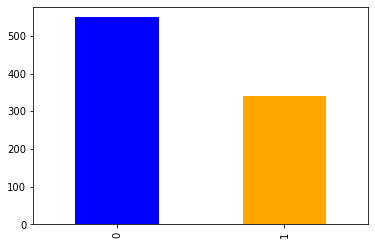

In [300]:
### Checking if the dataset is balanced.
count_Class=pd.value_counts(X_train["Survived"], sort= True)
print(count_Class)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.show()

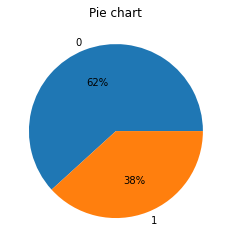

In [301]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

### SMOTE Sampling for unbalanced dataset

In [302]:
from imblearn.over_sampling import SMOTE
y_train = X_train['Survived'].values
# y_test = X_test['Survived'].values --> Label is the different file
# Read the labels of test dataset
y_test = pd.read_csv('./datasets/gender_submission.csv', index_col=0)
y_test = y_test['Survived'][idx_test]
# Test Dataset and Train Dataset features
X_test = X_test[features].values
X_train = X_train[features].values

In [303]:
# Transform the dataset
oversample = SMOTE()
X_train, y_train  = oversample.fit_resample(X_train, y_train)

### Classification with GaussianNB Model

In [304]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# fit it to training data
model.fit(X_train,y_train)
model

GaussianNB()

#### Prediction Status

In [305]:
# predict using test data
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 0]


#### Predicted probabilities

In [306]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob)

[[9.08254001e-01 9.17459989e-02]
 [3.37942589e-01 6.62057411e-01]
 [8.18489486e-01 1.81510514e-01]
 [9.35220655e-01 6.47793447e-02]
 [2.49400484e-01 7.50599516e-01]
 [9.18540358e-01 8.14596422e-02]
 [2.02225524e-01 7.97774476e-01]
 [8.45286780e-01 1.54713220e-01]
 [6.82031809e-02 9.31796819e-01]
 [9.89094682e-01 1.09053184e-02]
 [9.37573161e-01 6.24268389e-02]
 [6.63298114e-01 3.36701886e-01]
 [7.99248384e-03 9.92007516e-01]
 [8.85192733e-01 1.14807267e-01]
 [2.58420844e-02 9.74157916e-01]
 [3.82064243e-02 9.61793576e-01]
 [8.19454073e-01 1.80545927e-01]
 [7.42416649e-01 2.57583351e-01]
 [3.04594865e-01 6.95405135e-01]
 [9.11966118e-02 9.08803388e-01]
 [1.87469193e-01 8.12530807e-01]
 [8.85314172e-01 1.14685828e-01]
 [4.25509527e-02 9.57449047e-01]
 [1.07372665e-01 8.92627335e-01]
 [4.11686975e-13 1.00000000e+00]
 [9.50989587e-01 4.90104128e-02]
 [3.21867573e-03 9.96781324e-01]
 [7.47647077e-01 2.52352923e-01]
 [6.48327805e-01 3.51672195e-01]
 [9.59525873e-01 4.04741267e-02]
 [8.921569

### Evaluating

In [307]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
print('Confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("Accuracy: ", accuracy_score(y_test,y_pred))

Confusion matrix:
 [[228  37]
 [  7 145]]
Accuracy:  0.894484412470024
